In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv("Company_DAta.csv")

In [67]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [68]:
df.shape

(400, 11)

In [69]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [70]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [71]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [72]:
df.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [73]:
df.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [74]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Medium': 1, 'Bad': 2, 'Good': 3})
df['Urban'] = df['Urban'].apply(lambda x: 1 if x == 'Yes' else 0)
df['US'] = df['US'].apply(lambda x: 1 if x== 'Yes' else 0)

<AxesSubplot:>

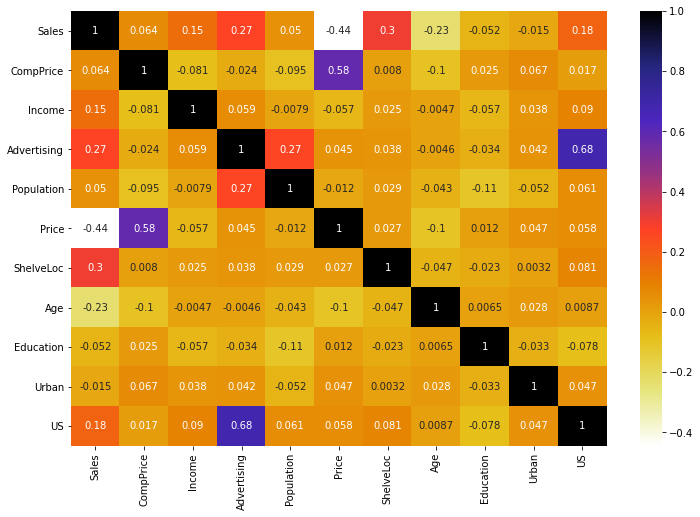

In [75]:
## Find the high correlated Values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

In [76]:
## find the feature engineering correlation
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
                if (corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [77]:
corr = correlation(df, 0.7)
len(corr)

0

## Not highly correlated Value found

In [79]:
df[:2]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,2,42,17,1,1
1,11.22,111,48,16,260,83,3,65,10,1,1


<AxesSubplot:xlabel='Sales', ylabel='Income'>

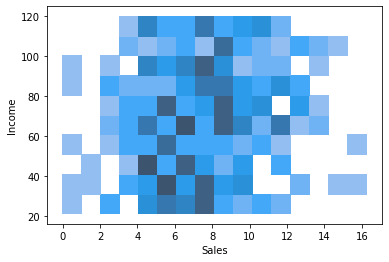

In [81]:
##Visualization
sns.histplot(x='Sales', y='Income', data=df)

<AxesSubplot:xlabel='Sales', ylabel='Price'>

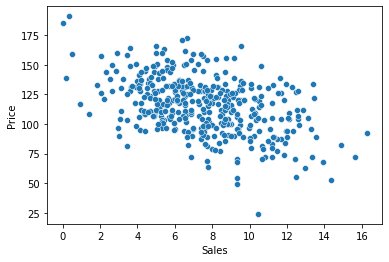

In [86]:
sns.scatterplot(x='Sales', y='Price', data=df)

<AxesSubplot:xlabel='Education', ylabel='Sales'>

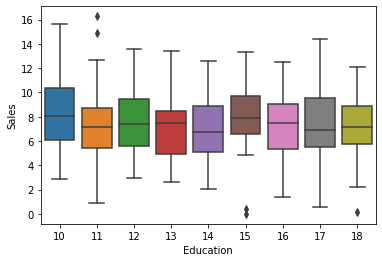

In [89]:
sns.boxplot(x='Education', y='Sales', data=df)

<AxesSubplot:xlabel='Sales', ylabel='Age'>

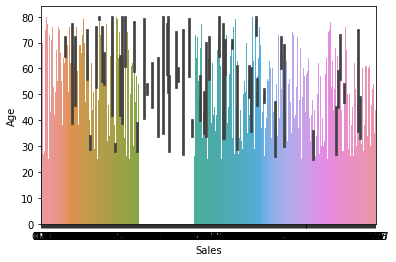

In [92]:
sns.barplot(x='Sales', y='Age', data=df)

<AxesSubplot:xlabel='Sales', ylabel='Income'>

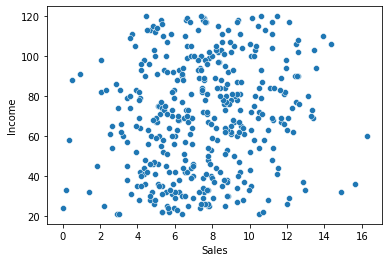

In [97]:
sns.scatterplot(x='Sales', y='Income', data=df)

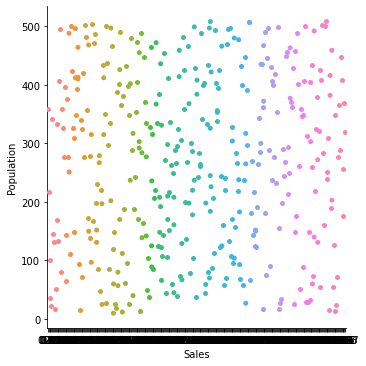

In [101]:
sns.catplot(x='Sales', y='Population', data=df)

In [78]:
df.ShelveLoc.value_counts()

1    219
2     96
3     85
Name: ShelveLoc, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(8), object(2)
memory usage: 34.5+ KB


In [15]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.665000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.805853,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,1.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000


In [22]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,>10,138,73,11,276,120,2,42,17,1,1
1,<=10,111,48,16,260,83,3,65,10,1,1
2,<=10,113,35,10,269,80,1,59,12,1,1
3,>10,117,100,4,466,97,1,55,14,1,1
4,>10,141,64,3,340,128,2,38,13,1,0


In [23]:
df.drop('ShelveLoc',axis=1, inplace=True)

In [24]:
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,>10,138,73,11,276,120,42,17,1,1
1,<=10,111,48,16,260,83,65,10,1,1


## Split the Data train and test

In [25]:
train = df.iloc[:, 1:]
test = df.Sales

In [26]:
train.head(2)

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,138,73,11,276,120,42,17,1,1
1,111,48,16,260,83,65,10,1,1


In [27]:
test[:2]

0     >10
1    <=10
Name: Sales, dtype: object

## Standardize the Data

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
new_data_train = scaler.fit_transform(train)

## Split the dataset into Training and testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3)

## build the DecisionTree model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
classifier = DecisionTreeClassifier()
fit = classifier.fit(X_train,y_train)

In [34]:
prid = fit.predict(X_test)
prid[:5]

array(['>10', '>10', '>10', '<=10', '>10'], dtype=object)

In [35]:
y_test[:4]

70     >10
276    >10
238    >10
29     >10
Name: Sales, dtype: object

In [36]:
fit.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

## check accuracy

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, prid)

0.7416666666666667

## Confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test, prid)

In [41]:
cm

array([[13, 14],
       [17, 76]], dtype=int64)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

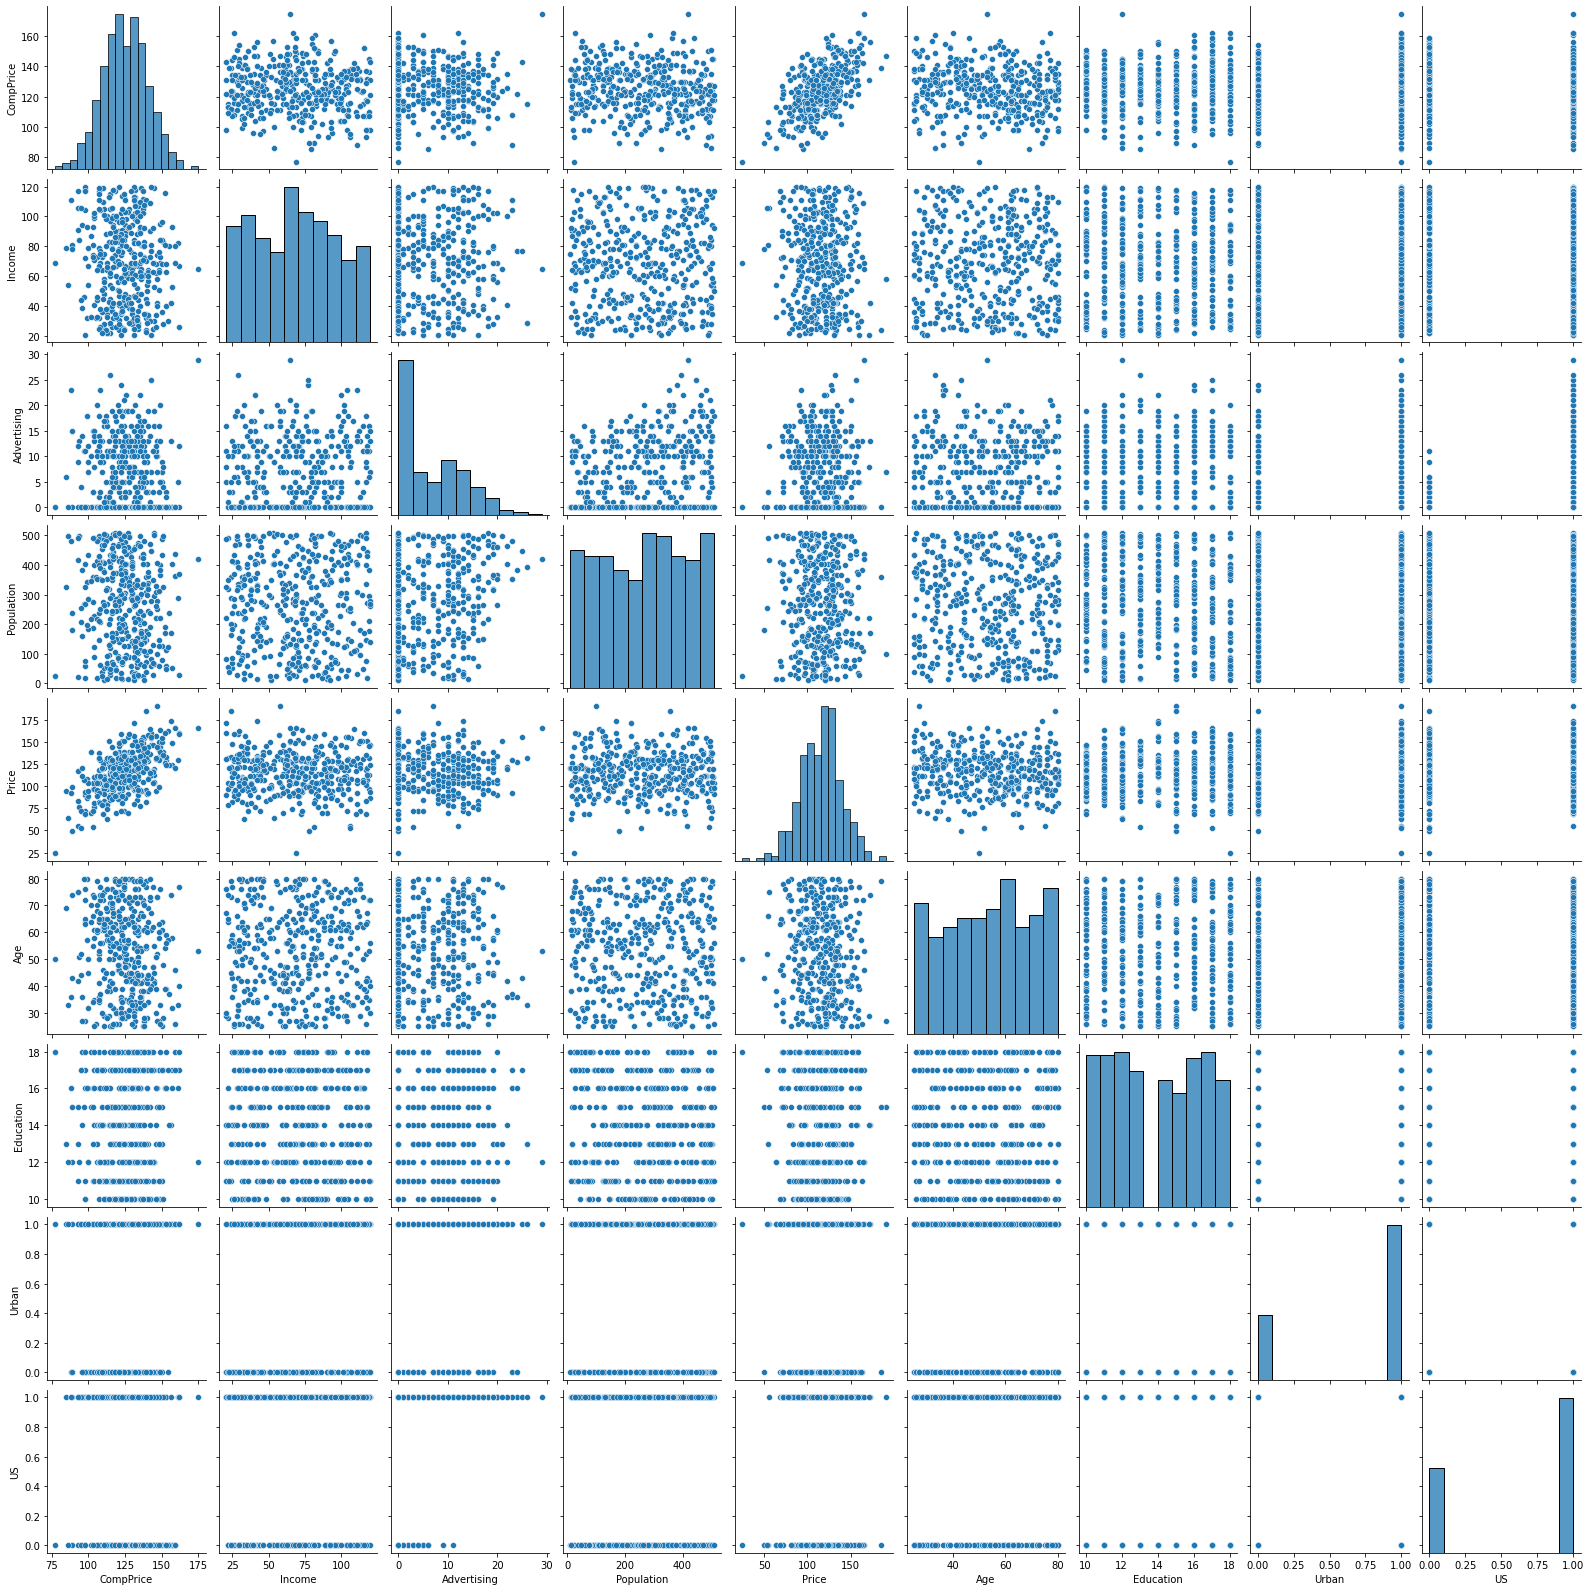

In [43]:
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show